# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 1 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

In [346]:
import pandas as pd

movies = pd.read_csv("movies_complete.csv", parse_dates=["release_date"], index_col='id')
movies

,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
id,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,...,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,...,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,...,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,Iran,...,4.0,0.072051,90.0,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,...,9.0,0.178241,360.0,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,...,3.8,0.903007,90.0,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester


__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

In [62]:
def top_5(df,column:str, bool: bool):
    return df.sort_values(by=column, ascending=bool)[['title',column]].head(5)

__Movies Top 5 - Highest Revenue__

In [63]:
top5_revenue = top_5(movies,'revenue_musd', False)
top5_revenue

,title,revenue_musd
14448,Avatar,2787.965087
26265,Star Wars: The Force Awakens,2068.223624
1620,Titanic,1845.034188
17669,The Avengers,1519.557910
24812,Jurassic World,1513.528810


__Movies Top 5 - Highest Budget__

In [64]:
top5_budget = top_5(movies,"budget_musd", False)
top5_budget

,title,budget_musd
16986,Pirates of the Caribbean: On Stranger Tides,380.0
11743,Pirates of the Caribbean: At World's End,300.0
26268,Avengers: Age of Ultron,280.0
10985,Superman Returns,270.0
16006,Tangled,260.0


__Movies Top 5 - Highest Profit__

In [65]:
movies = movies.assign(Profit = lambda x: x['revenue_musd'] - x['budget_musd'])

top5_profit = top_5(movies,'Profit', False)
top5_profit

,title,Profit
14448,Avatar,2550.965087
26265,Star Wars: The Force Awakens,1823.223624
1620,Titanic,1645.034188
24812,Jurassic World,1363.528810
28501,Furious 7,1316.249360


__Movies Top 5 - Lowest Profit__

In [66]:
top5_lowest_profit = top_5(movies,'Profit', True)
top5_lowest_profit

,title,Profit
20959,The Lone Ranger,-165.710090
7164,The Alamo,-119.180039
16659,Mars Needs Moms,-111.007242
43611,Valerian and the City of a Thousand Planets,-107.447384
2684,The 13th Warrior,-98.301101


__Movies Top 5 - Highest ROI__

In [72]:
movies_budget_higher_than_10 = movies.loc[movies['budget_musd'] >= 10 ]
movies_budget_higher_than_10 = movies_budget_higher_than_10.assign(ROI = lambda x: (x['revenue_musd']/x['budget_musd']))

top5_roi = top_5(movies_budget_higher_than_10, 'ROI', False)
top5_roi

,title,ROI
1055,E.T. the Extra-Terrestrial,75.520507
255,Star Wars,70.490728
588,Pretty Woman,33.071429
18300,The Intouchables,32.806221
1144,The Empire Strikes Back,29.911111


__Movies Top 5 - Lowest ROI__

In [73]:
top5_lowest_roi = top_5(movies_budget_higher_than_10, 'ROI', True)
top5_lowest_roi

,title,ROI
6955,Chasing Liberty,5.217391e-07
8041,The Cookout,7.500000e-07
17381,Deadfall,1.800000e-06
6678,In the Cut,1.916667e-06
20015,The Samaritan,2.100833e-04


__Movies Top 5 - Most Votes__

In [84]:
top_5_most_votes = top_5(movies, 'vote_count', False)
top_5_most_votes

,title,vote_count
15368,Inception,14075.0
12396,The Dark Knight,12269.0
14448,Avatar,12114.0
17669,The Avengers,12000.0
26272,Deadpool,11444.0


__Movies Top 5 - Highest Rating__

In [81]:
more_than_10_rating_movie = movies.loc[movies['vote_count'] >= 10]
highest_rating = top_5(more_than_10_rating_movie, 'vote_average', False)
highest_rating

,title,vote_average
10233,Dilwale Dulhania Le Jayenge,9.1
2716,Stop Making Sense,8.7
42792,Tosun Pasha,8.6
826,The Godfather,8.5
313,The Shawshank Redemption,8.5


__Movies Top 5 - Lowest Rating__

In [82]:
lowest_rating = top_5(more_than_10_rating_movie, 'vote_average', True)
lowest_rating

,title,vote_average
25451,Foodfight!,2.3
6665,House of the Dead,2.8
8484,Eegah,2.8
3439,Battlefield Earth,3.0
6281,From Justin to Kelly,3.0


__Movies Top 5 - Most Popular__

In [83]:
most_popular_movie = top_5(movies, 'popularity', False)
most_popular_movie

,title,popularity
30330,Minions,547.488298
32927,Wonder Woman,294.337037
41556,Beauty and the Beast,287.253654
42940,Baby Driver,228.032744
24187,Big Hero 6,213.849907


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [120]:
mask_genres = movies.genres.str.contains('Science Fiction') & movies.genres.str.contains('Action')

In [121]:
actor = movies.cast.str.contains('Bruce Willis')

In [ ]:
movies.loc[mask_genres & actor, ['title', 'vote_average']].sort_values(by='vote_average', ascending=False)

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [129]:
filter = movies.cast.str.contains('Uma Thurman') & movies.director.str.contains('Quentin Tarantin')

movies.loc[filter, ['title', 'runtime']].sort_values(by='runtime', ascending=True)

,title,runtime
6667,Kill Bill: Vol. 1,111.0
7208,Kill Bill: Vol. 2,136.0
291,Pulp Fiction,154.0


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [166]:
mask = movies.production_companies.str.contains('Pixar').fillna(False)
date = movies.release_date.between('2010-01-01', '2015-12-31')

In [ ]:
movies.loc[mask & date, ['title', 'release_date']].sort_values(by='release_date', ascending=False)

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [176]:
genres_mask = movies.genres.str.contains('Action') | movies.genres.str.contains('Thriller')
spoken_languages_mask = movies.original_language == "en"
vote_average_mask = movies.vote_average >= 7.5
mask_vote_co = movies.vote_count >= 10

movies.loc[genres_mask & spoken_languages_mask & vote_average_mask & mask_vote_co, ['title', 'release_date']].sort_values(by='release_date', ascending=False).head(10)

,title,release_date
44490,Descendants 2,2017-07-21
43941,Dunkirk,2017-07-19
42624,The Book of Henry,2017-06-16
26273,Guardians of the Galaxy Vol. 2,2017-04-19
41506,Logan,2017-02-28
40525,The Thinning,2016-10-12
37677,11.22.63,2016-02-15
26265,Star Wars: The Force Awakens,2015-12-15
42581,London Spy,2015-11-09
32618,Spotlight,2015-11-06


## Which is the most common words

In [180]:
!pip install wordcloud

You should consider upgrading via the '/Users/vincentcheung/Desktop/Coding/Python-1/2_Intermediate_Project/app16_recommendation_system/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [186]:
title    = movies.title.dropna()
overview = movies.overview.dropna()
tagline  = movies.tagline.dropna()

In [190]:
title_corpus = ''.join(title)
overview_corpus = ''.join(overview)
tagline_corpus = ''.join(tagline)

In [194]:
title_cloud = WordCloud(background_color='white', height=2000, width=4000, max_words=200).generate(title_corpus)
title_cloud

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(title_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [206]:
tagline_cloud = WordCloud(background_color='white', height=2000, width=2000, max_words=100).generate(tagline_corpus)

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(tagline_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

__Franchise vs. Stand-alone: Average Revenue__

In [225]:
movies['Franchise'] = movies.belongs_to_collection.notna()

movies.groupby('Franchise').revenue_musd.mean()

Franchise
False     44.742814
True     165.708193
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [238]:
movies = movies.assign(roi = lambda x: (x['revenue_musd']/x['budget_musd']))

In [239]:
movies.groupby('Franchise').roi.median()

Franchise
False    1.619699
True     3.709195
Name: roi, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [240]:
movies.groupby('Franchise').budget_musd.mean()

Franchise
False    18.047741
True     38.319847
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [241]:
movies.groupby('Franchise').popularity.mean()

Franchise
False    2.592726
True     6.245051
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [242]:
movies.groupby('Franchise').vote_average.mean()

Franchise
False    6.008787
True     5.956806
Name: vote_average, dtype: float64

In [244]:
movies.groupby('Franchise').agg({
                                "revenue_musd" : "mean",
                                "roi"          : "median",
                                "budget_musd"  : "mean",
                                "popularity"   : "mean",
                                "vote_average" : "mean",
    
                                })

,revenue_musd,roi,budget_musd,popularity,vote_average
Franchise,,,,,
False,44.742814,1.619699,18.047741,2.592726,6.008787
True,165.708193,3.709195,38.319847,6.245051,5.956806


## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [259]:
movies.belongs_to_collection.value_counts()

belongs_to_collection
The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: count, Length: 1691, dtype: int64

In [272]:
franchises = movies.groupby('belongs_to_collection').agg({"title":"count","budget_musd":["sum",'mean'], "revenue_musd":["sum","mean"], "vote_average":"mean", "vote_count":"mean"})

In [266]:
franchises.nlargest(20, ('title', 'count'))

title budget_musd             \
                                       count         sum       mean   
belongs_to_collection                                                 
The Bowery Boys                           29      0.0000        NaN   
Totò Collection                           27      0.0000        NaN   
James Bond Collection                     26   1539.6500  59.217308   
Zatôichi: The Blind Swordsman             26      0.0000        NaN   
The Carry On Collection                   25      0.0000        NaN   
Charlie Chan (Sidney Toler) Collection    21      0.0000        NaN   
Pokémon Collection                        20    250.7204  50.144080   
Godzilla (Showa) Collection               16      2.8100   0.562000   
Charlie Chan (Warner Oland) Collection    15      0.0000        NaN   
Dragon Ball Z (Movie) Collection          15      5.0000   5.000000   
Uuno Turhapuro                            15      0.0000        NaN   
Monster High Collection                   14      0.5000   0.500000   
The Land Before Time Collection           14     12.3000  12.300000   
George Carlin Comedy Collection           13      0.0000        NaN   
Sharpe Collection                         13      0.0000        NaN   
Friday the 13th Collection                12     84.4000   7.033333   
Johan Falk GSI Collection                 12      0.0000        NaN   
Sherlock Holmes (1939 series)             12      0.0000        NaN   
The Amityville Horror Collection          12     21.0200   5.255000   
An American Girl Collection               10      6.8000   6.800000   

                                       revenue_musd             vote_average  
                                                sum        mean         mean  
belongs_to_collection                                                         
The Bowery Boys                            0.000000         NaN     6.675000  
Totò Collection                            0.000000         NaN     6.837037  
James Bond Collection                   7106.970239  273.345009     6.338462  
Zatôichi: The Blind Swordsman              0.000000         NaN     6.403846  
The Carry On Collection                    0.000000         NaN     6.168000  
Charlie Chan (Sidney Toler) Collection     0.000000         NaN     6.609524  
Pokémon Collection                       601.865958   66.873995     6.055000  
Godzilla (Showa) Collection                0.000000         NaN     5.975000  
Charlie Chan (Warner Oland) Collection     0.000000         NaN     6.658333  
Dragon Ball Z (Movie) Collection         112.121192   56.060596     6.606667  
Uuno Turhapuro                             0.000000         NaN     5.526667  
Monster High Collection                    0.000000         NaN     6.485714  
The Land Before Time Collection           84.460846   84.460846     6.164286  
George Carlin Comedy Collection            0.000000         NaN     7.469231  
Sharpe Collection                          0.000000         NaN     6.738462  
Friday the 13th Collection               464.898544   38.741545     5.425000  
Johan Falk GSI Collection                  0.000000         NaN     6.500000  
Sherlock Holmes (1939 series)              0.000000         NaN     6.925000  
The Amityville Horror Collection         213.347083   53.336771     4.358333  
An American Girl Collection                0.000000         NaN     5.250000

In [274]:
franchises[franchises[('vote_count', 'mean')] >= 1000].nlargest(20, ('vote_count', 'mean'))

title budget_musd             revenue_musd  \
                                   count         sum        mean          sum   
belongs_to_collection                                                           
Avatar Collection                      1      237.00  237.000000  2787.965087   
Deadpool Collection                    1       58.00   58.000000   783.112979   
The Dark Knight Collection             3      585.00  195.000000  2463.716216   
The Avengers Collection                2      500.00  250.000000  2924.961604   
Iron Man Collection                    3      540.00  180.000000  2424.547547   
The Lord of the Rings Collection       3      266.00   88.666667  2916.544743   
Guardians of the Galaxy Collection     2      370.00  185.000000  1636.744770   
Captain America Collection             3      560.00  186.666667  2238.640841   
Man of Steel Collection                2      475.00  237.500000  1536.105712   
The Hunger Games Collection            4      490.00  122.500000  2944.162634   
Kingsman Collection                    1       81.00   81.000000   414.351546   
Ant-Man Collection                     1      130.00  130.000000   519.311965   
Harry Potter Collection                8     1280.00  160.000000  7707.367425   
The Hobbit Collection                  3      750.00  250.000000  2935.523356   
Thor Collection                        2      320.00  160.000000  1093.898020   
World War Z Collection                 1      200.00  200.000000   531.865000   
Fantastic Beasts Collection            1      180.00  180.000000   809.342332   
The Amazing Spider-Man Collection      2      415.00  207.500000  1457.933289   
Star Wars Collection                   8      854.35  106.793750  7434.494790   
Finding Nemo Collection                2      294.00  147.000000  1968.906425   

                                                vote_average    vote_count  
                                           mean         mean          mean  
belongs_to_collection                                                       
Avatar Collection                   2787.965087     7.200000  12114.000000  
Deadpool Collection                  783.112979     7.400000  11444.000000  
The Dark Knight Collection           821.238739     7.800000   9681.000000  
The Avengers Collection             1462.480802     7.350000   9454.000000  
Iron Man Collection                  808.182516     6.933333   8290.333333  
The Lord of the Rings Collection     972.181581     8.033333   8253.000000  
Guardians of the Galaxy Collection   818.372385     7.750000   7436.000000  
Captain America Collection           746.213614     7.100000   6839.000000  
Man of Steel Collection              768.052856     6.100000   6825.500000  
The Hunger Games Collection          736.040659     6.875000   6543.500000  
Kingsman Collection                  414.351546     7.600000   6069.000000  
Ant-Man Collection                   519.311965     7.000000   6029.000000  
Harry Potter Collection              963.420928     7.537500   5983.250000  
The Hobbit Collection                978.507785     7.233333   5981.333333  
Thor Collection                      546.949010     6.700000   5775.500000  
World War Z Collection               531.865000     6.700000   5683.000000  
Fantastic Beasts Collection          809.342332     7.200000   5612.000000  
The Amazing Spider-Man Collection    728.966645     6.500000   5504.000000  
Star Wars Collection                 929.311849     7.375000   5430.375000  
Finding Nemo Collection              984.453213     7.200000   5312.500000

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

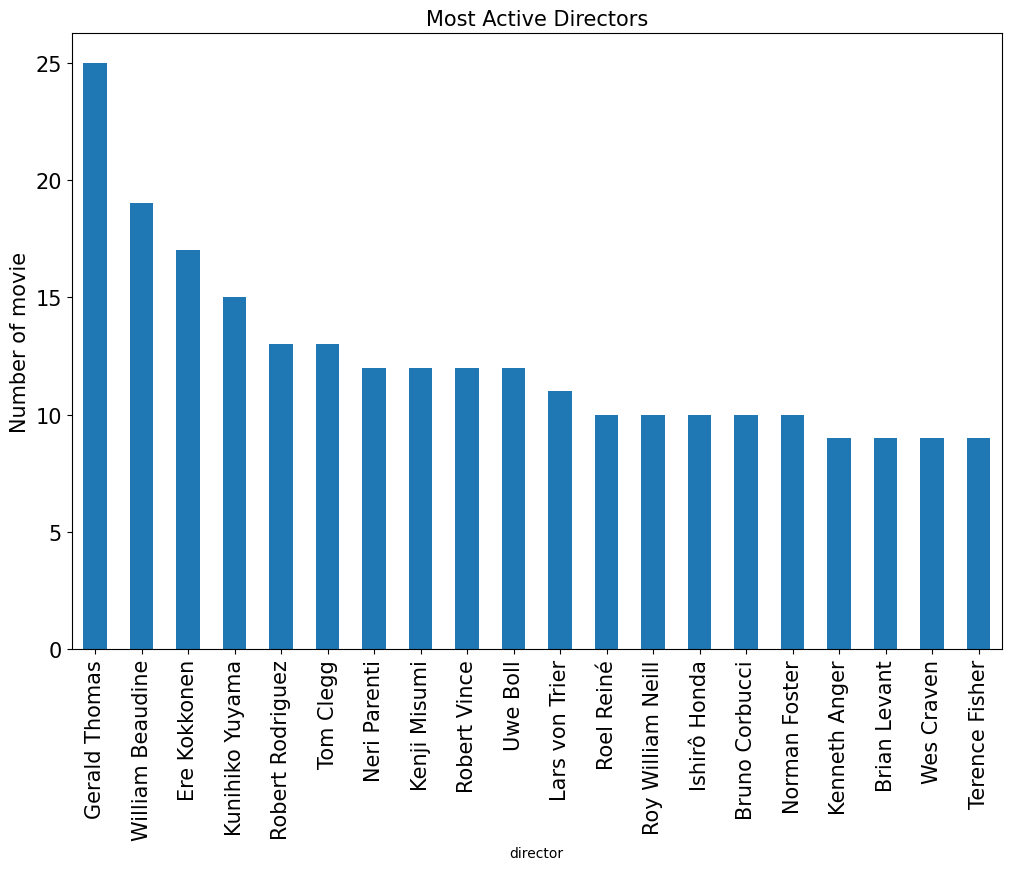

In [294]:
plt.figure(figsize=(12,8))
movies.director.value_counts().head(20).plot(kind='bar', fontsize=15)
plt.title("Most Active Directors",fontsize = 15)
plt.ylabel("Number of movie", fontsize=15)
plt.show()

In [276]:
directors = movies.groupby('director').agg({'title':'count','revenue_musd':'sum','vote_average':'mean'})

In [285]:
directors.nlargest(20, ("revenue_musd"))

,title,revenue_musd,vote_average
director,,,
Peter Jackson,6,5852.068099,7.633333
David Yates,5,4977.820135,7.480000
Michael Bay,7,4780.847824,6.214286
Steven Spielberg,7,3603.562334,7.057143
James Cameron,5,3569.652742,6.780000
George Lucas,5,3339.113893,6.980000
J.J. Abrams,4,3319.119328,7.200000
Gore Verbinski,4,2931.019969,6.975000
Joss Whedon,2,2924.961604,7.350000


## Who's the most successful actor 

### My answer

In [65]:
cast_list = movies.cast.dropna().str.split('|')

In [69]:
new_cast_list = [cast for list in cast_list for cast in list]

df = pd.DataFrame(new_cast_list)
df.value_counts()


Bess Flowers            240
Christopher Lee         148
John Wayne              125
Samuel L. Jackson       122
Michael Caine           110
                       ... 
James Vasquez             1
James Vieira              1
James Vincent Boland      1
James Vincent Romano      1
조병만                       1
Name: count, Length: 201501, dtype: int64

### Offical Answers

In [105]:
act         = movies.cast.str.split("|", expand=True)
act         = act.stack().reset_index(level=1, drop=True).to_frame()
act.columns = ['Actor']

In [107]:
right_table = movies[['title', 'revenue_musd', 'vote_average', 'popularity']]
act         = act.merge(right_table, how='left', left_index=True, right_index=True)

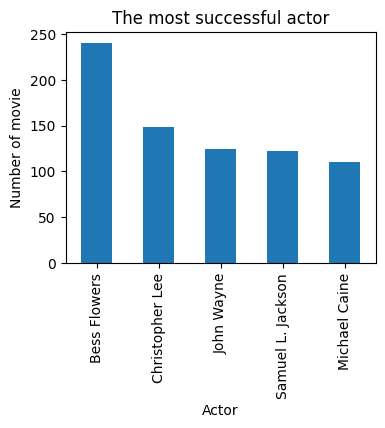

In [138]:
plt.figure(figsize=(4,3))
act.Actor.value_counts().head(5).plot(kind='bar', title='The most successful actor', ylabel='Number of movie')
plt.show()

In [150]:
act_summary = act.groupby('Actor').agg(
                        total_movie=("Actor", 'count'),
                        total_revenue = ("revenue_musd","sum"), 
                        average_revenue=("revenue_musd", 'mean'),
                        mean_popularity=("popularity", 'mean'),
                        mean_vote=("vote_average", 'mean'))

In [200]:
act_summary = act_summary[act_summary.total_movie >= 10]
act_summary.nlargest(20, 'average_revenue')



,total_movie,total_revenue,average_revenue,mean_popularity,mean_vote
Actor,,,,,
Gloria Stuart,18,1845.034188,1845.034188,3.477432,6.368750
Keith Richards,23,2967.713802,989.237934,5.032988,6.463636
Zoë Wanamaker,10,976.475550,976.475550,6.819019,6.330000
James Cameron,12,1862.075059,931.037530,4.691718,7.063636
Matthew Lewis,11,7915.312500,879.479167,23.097479,7.372727
Luke de Woolfson,11,1720.671036,860.335518,8.767206,5.718182
Yuri Lowenthal,17,1708.162716,854.081358,19.884649,6.188235
Dominic Monaghan,11,3289.607607,822.401902,10.621675,6.045455
Philip Ng,10,821.708551,821.708551,6.353320,5.920000


In [219]:
movies.loc[(movies.original_language == 'en') | (movies.original_language == 'fa'), ['title']].head(10)

,title
id,
862,Toy Story
8844,Jumanji
15602,Grumpier Old Men
31357,Waiting to Exhale
11862,Father of the Bride Part II
949,Heat
11860,Sabrina
45325,Tom and Huck
9091,Sudden Death


In [220]:
movies.original_language.value_counts()

original_language
en    31755
fr     2400
it     1471
ja     1339
de     1064
      ...  
jv        1
qu        1
la        1
fy        1
si        1
Name: count, Length: 89, dtype: int64

## What are the most successful/popular genres? Has this changed over time (e.g. 80ths vs. 90ths)?

In [347]:
genres_df        = movies.genres.str.split('|', expand=True)
genres_df        = genres_df.stack().reset_index(level=1, drop=True).to_frame()
genres_df.columns = ['genre']

In [348]:
merged_df = movies[['release_date','revenue_musd', 'budget_musd','vote_average', 'popularity']]

In [349]:
genres_df = genres_df.merge(merged_df, how='left', left_index=True, right_index=True)

In [350]:
eightyth_movies = genres_df.loc[genres_df.release_date.between('1980-01-01', '1989-12-31')]
nintyth_movies  = genres_df.loc[genres_df.release_date.between('1990-01-01', '1999-12-31')]

eightyth_movies         = eightyth_movies.genre.value_counts().to_frame()
nintyth_movies          = nintyth_movies.genre.value_counts().to_frame()

In [375]:
genre_table         = eightyth_movies.merge(nintyth_movies, how='left', left_index=True, right_index=True)
genre_table.columns = ['2018s', '2019s']

In [378]:
genre_table         = genre_table.assign(Growth=lambda x: round(x['2019s'] / x['2018s'] - 1, 2) )
genre_table[genre_table['2018s'] >=200].sort_values(by='Growth', ascending=False)


,2018s,2019s,Growth
genre,,,
Family,252,479,0.90
Romance,539,982,0.82
Thriller,597,1044,0.75
Drama,1541,2592,0.68
Crime,389,582,0.50
Comedy,1289,1841,0.43
Action,710,992,0.40
Mystery,208,283,0.36
Adventure,390,483,0.24
